# Handwriting Recognition Dataset Analysis
## Complete EDA of IAM Handwriting Dataset

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import os

try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('ggplot')
sns.set_palette("husl")
os.makedirs('charts', exist_ok=True)

print("✓ Ready")

✓ Ready


In [ ]:
dataset = load_dataset("Teklia/IAM-line", split='train')
print(f"✓ Loaded {len(dataset)} samples")

✓ Loaded 6482 samples


✓ Chart 1 saved


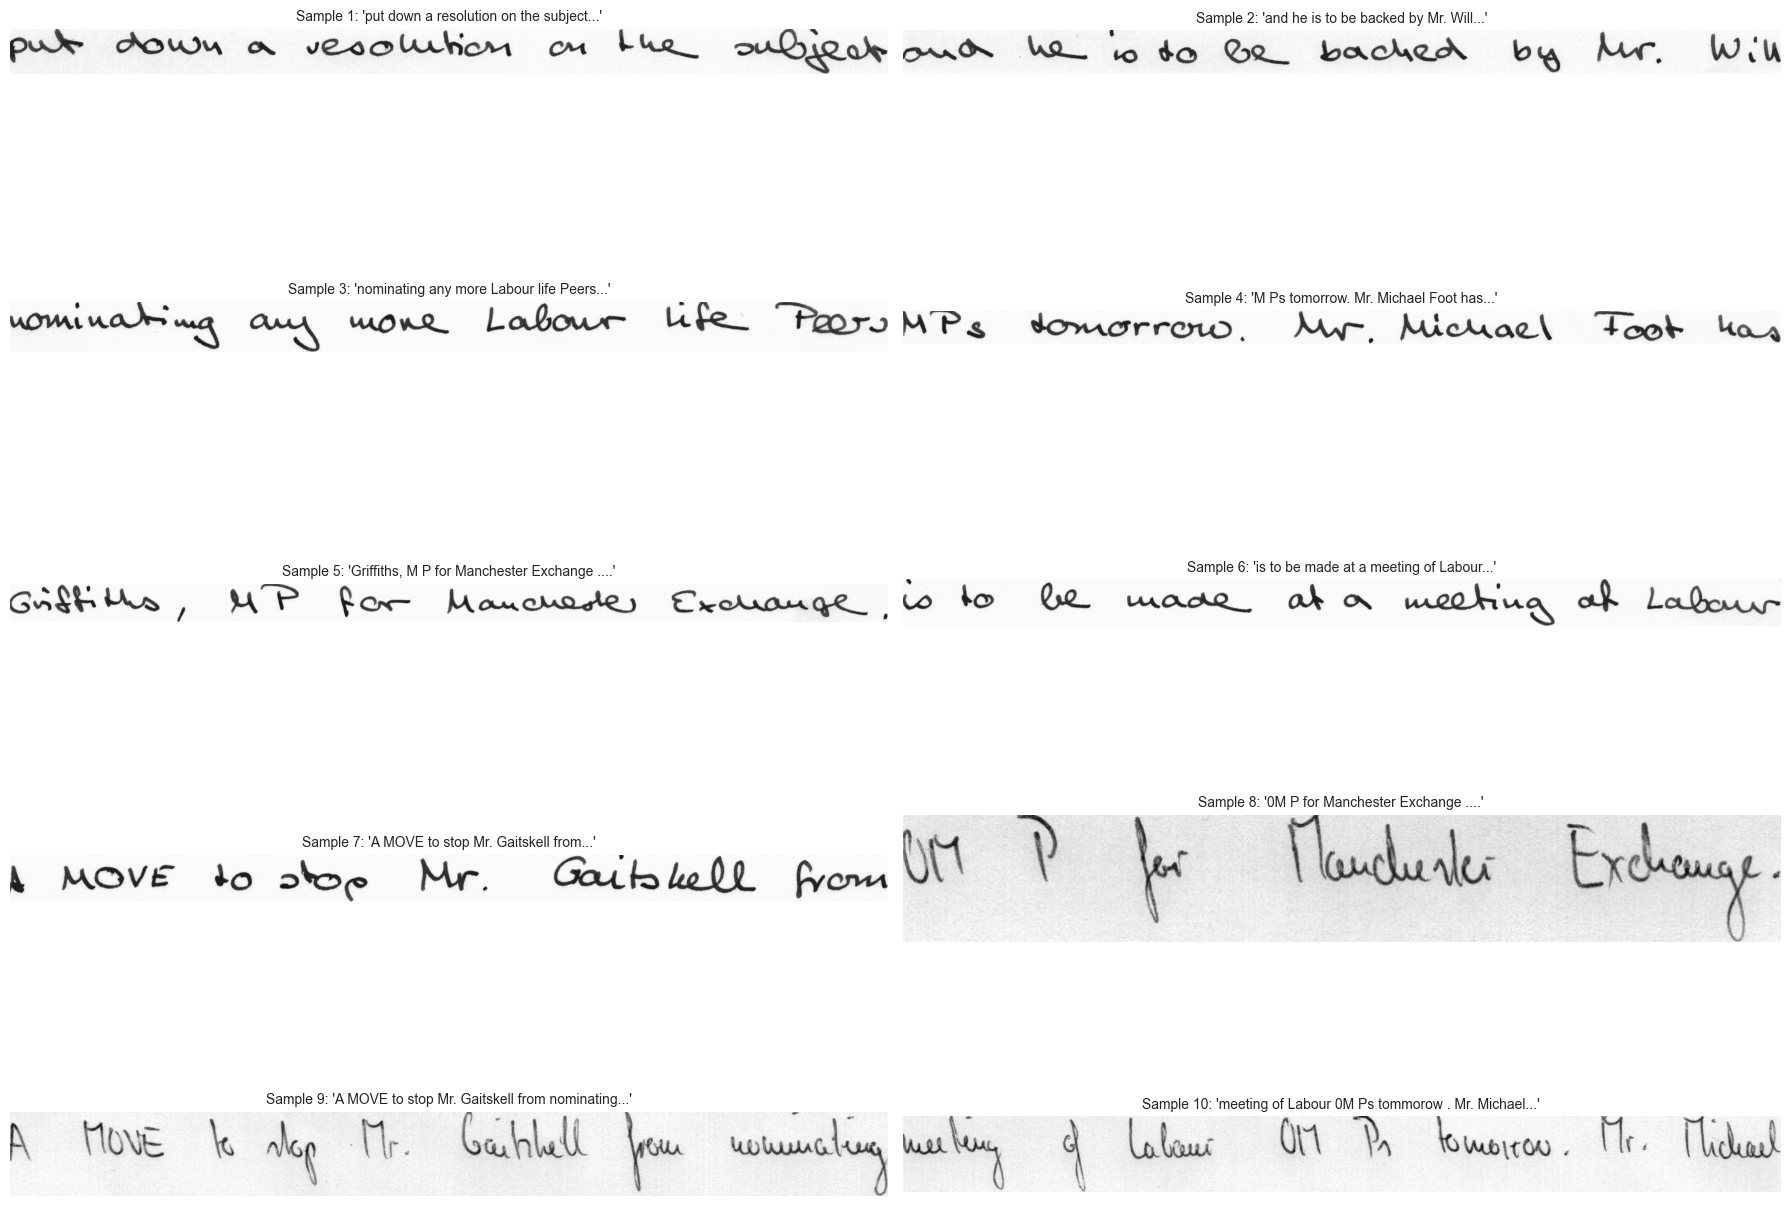

In [ ]:
# Chart 1: Samples
fig, axes = plt.subplots(5, 2, figsize=(18, 15))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(dataset[i]['image'], cmap='gray')
    axes[i].set_title(f"Sample {i+1}: '{dataset[i]['text'][:50]}...'", fontsize=10)
    axes[i].axis('off')
plt.tight_layout()
plt.savefig('charts/01_sample_images.png', dpi=150)
print("✓ Chart 1 saved")
plt.show()

✓ Chart 2 saved (min:7, max:69, mean:41.6)


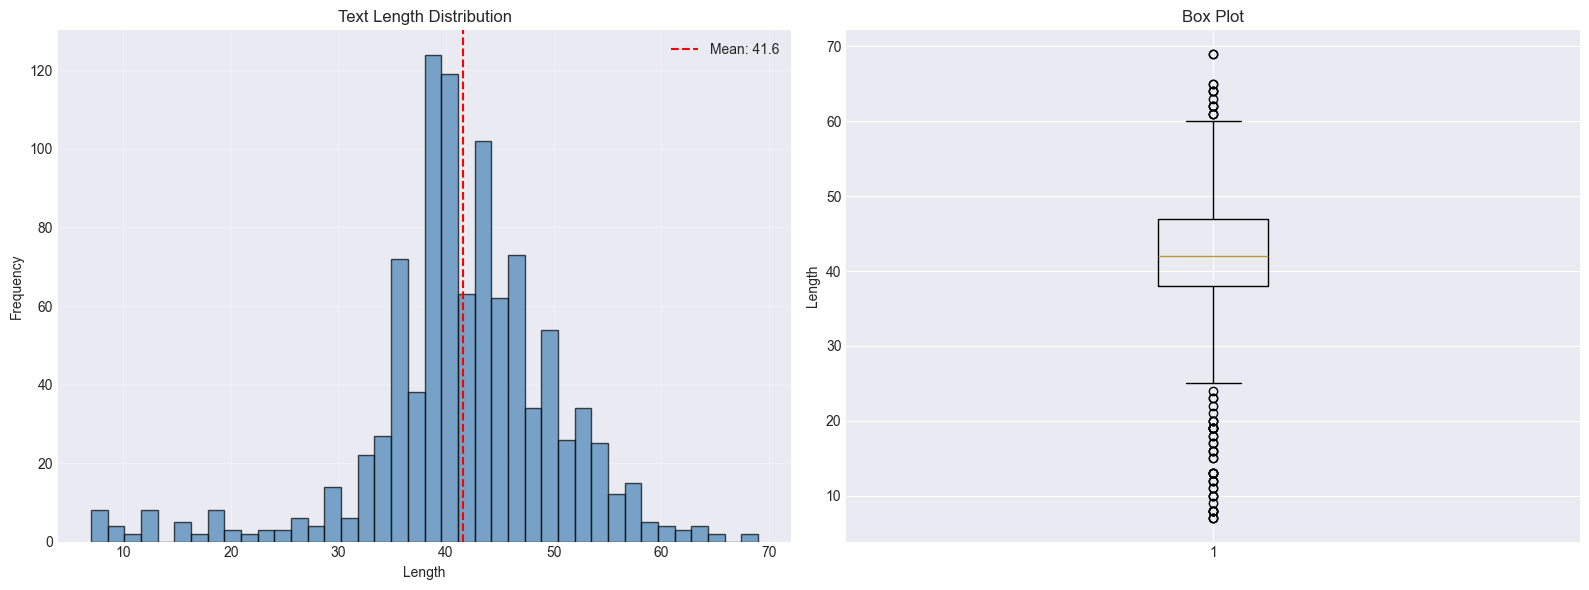

In [ ]:
# Chart 2: Text lengths
text_lengths = [len(dataset[i]['text']) for i in range(min(1000, len(dataset)))]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(text_lengths, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.mean(text_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(text_lengths):.1f}')
ax1.set_xlabel('Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Text Length Distribution')
ax1.legend()
ax1.grid(alpha=0.3)
ax2.boxplot(text_lengths)
ax2.set_ylabel('Length')
ax2.set_title('Box Plot')
plt.tight_layout()
plt.savefig('charts/02_text_length_distribution.png', dpi=150)
print(f"✓ Chart 2 saved (min:{min(text_lengths)}, max:{max(text_lengths)}, mean:{np.mean(text_lengths):.1f})")
plt.show()

✓ Chart 3 saved


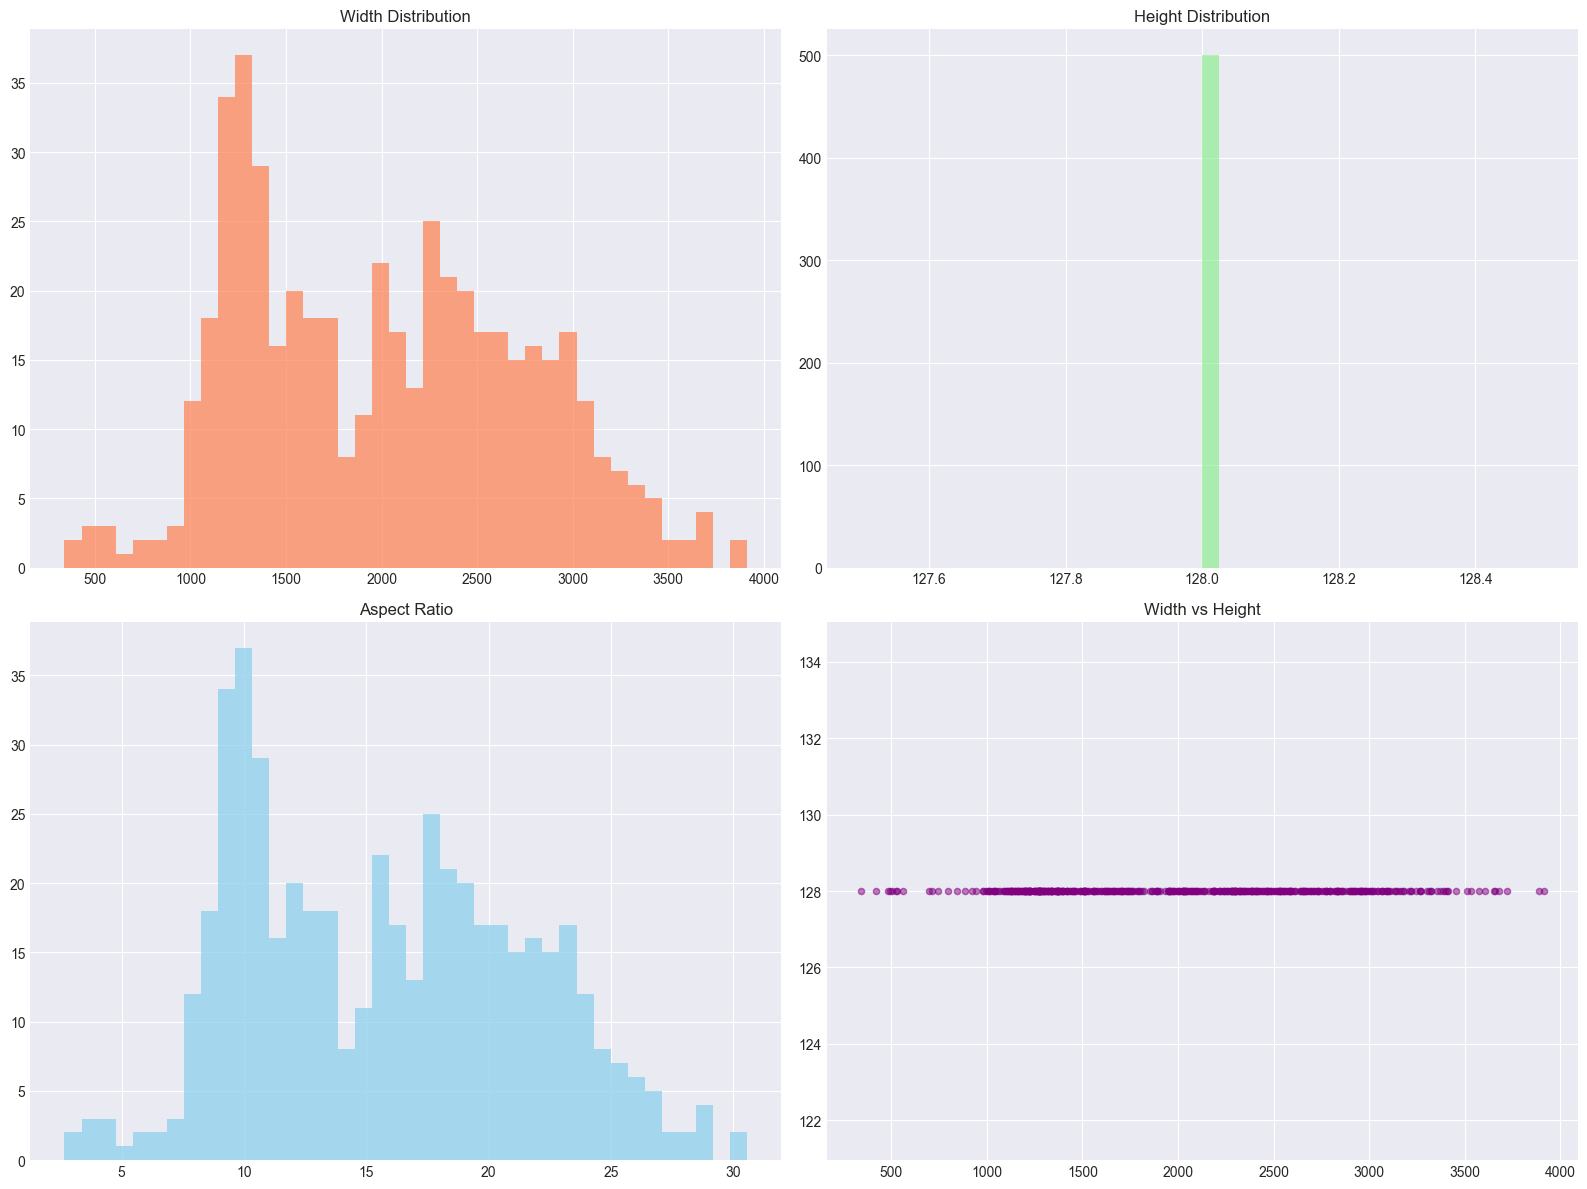

In [ ]:
# Chart 3: Image dimensions
widths = [dataset[i]['image'].size[0] for i in range(min(500, len(dataset)))]
heights = [dataset[i]['image'].size[1] for i in range(min(500, len(dataset)))]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0,0].hist(widths, bins=40, color='coral', alpha=0.7)
axes[0,0].set_title('Width Distribution')
axes[0,1].hist(heights, bins=40, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Height Distribution')
axes[1,0].hist([w/h for w,h in zip(widths,heights)], bins=40, color='skyblue', alpha=0.7)
axes[1,0].set_title('Aspect Ratio')
axes[1,1].scatter(widths, heights, alpha=0.5, s=20, c='purple')
axes[1,1].set_title('Width vs Height')
plt.tight_layout()
plt.savefig('charts/03_image_dimensions.png', dpi=150)
print("✓ Chart 3 saved")
plt.show()

✓ Chart 4 saved (unique chars: 75)


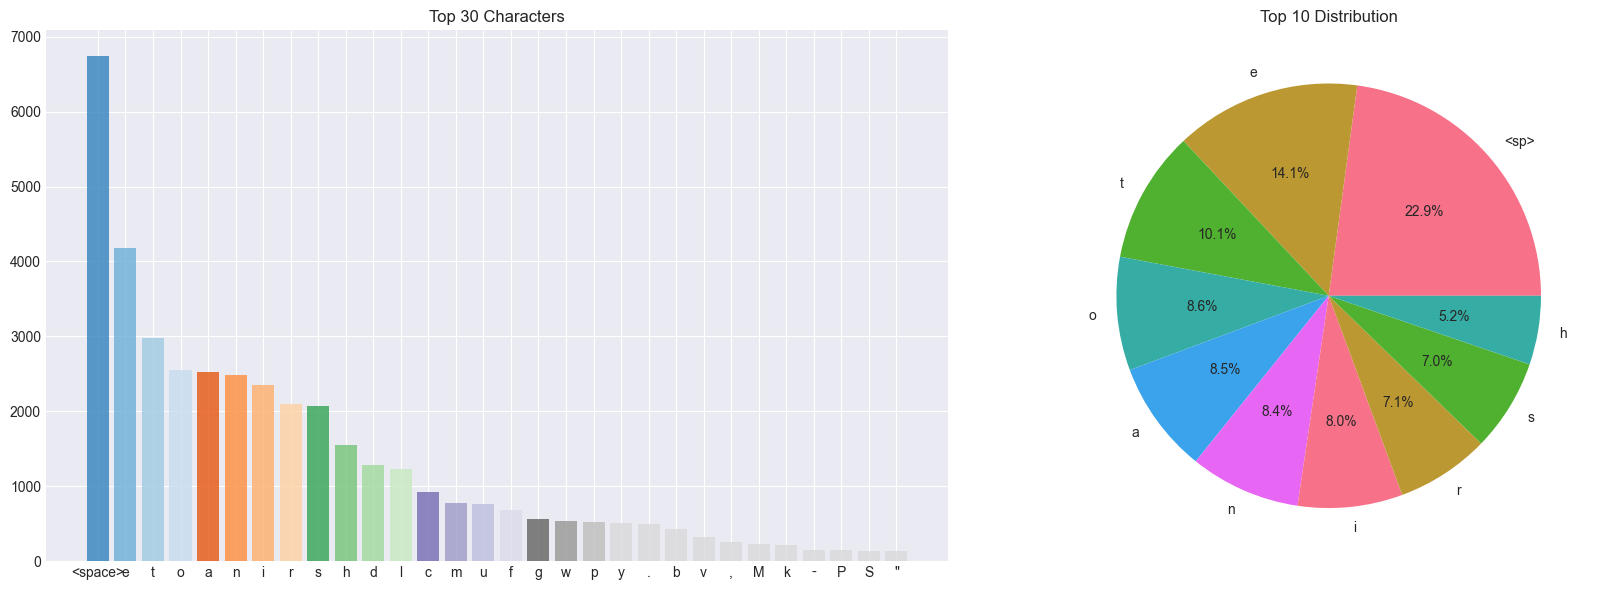

In [ ]:
# Chart 4: Character frequency
all_chars = Counter()
for i in range(min(1000, len(dataset))):
    all_chars.update(dataset[i]['text'])
top30 = all_chars.most_common(30)
chars, counts = zip(*top30)
chars = ['<space>' if c==' ' else c for c in chars]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.bar(range(len(chars)), counts, color=plt.cm.tab20c(range(len(chars))), alpha=0.8)
ax1.set_xticks(range(len(chars)))
ax1.set_xticklabels(chars)
ax1.set_title('Top 30 Characters')
top10 = all_chars.most_common(10)
ax2.pie([c for _,c in top10], labels=['<sp>' if c==' ' else c for c,_ in top10], autopct='%1.1f%%')
ax2.set_title('Top 10 Distribution')
plt.tight_layout()
plt.savefig('charts/04_character_frequency.png', dpi=150)
print(f"✓ Chart 4 saved (unique chars: {len(all_chars)})")
plt.show()

✓ Chart 5 saved


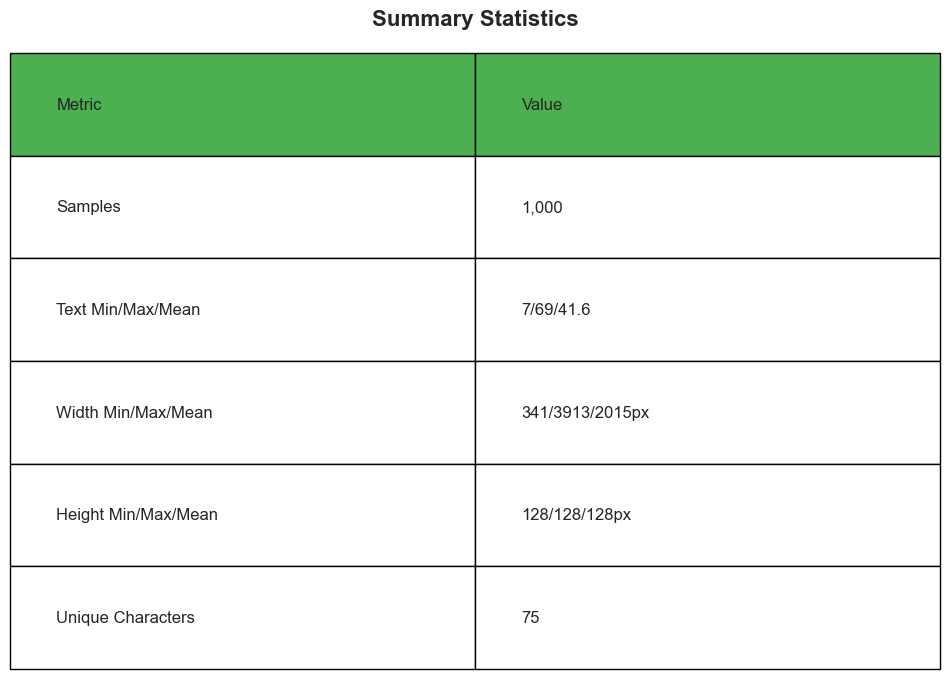


✓ ALL CHARTS SAVED TO charts/ folder


In [ ]:
# Chart 5: Summary table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
data = [
    ['Metric', 'Value'],
    ['Samples', f"{min(1000,len(dataset)):,}"],
    ['Text Min/Max/Mean', f"{min(text_lengths)}/{max(text_lengths)}/{np.mean(text_lengths):.1f}"],
    ['Width Min/Max/Mean', f"{min(widths)}/{max(widths)}/{np.mean(widths):.0f}px"],
    ['Height Min/Max/Mean', f"{min(heights)}/{max(heights)}/{np.mean(heights):.0f}px"],
    ['Unique Characters', str(len(all_chars))],
]
table = ax.table(cellText=data, loc='center', cellLoc='left', bbox=[0,0,1,1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1,3)
table[(0,0)].set_facecolor('#4CAF50')
table[(0,1)].set_facecolor('#4CAF50')
plt.title('Summary Statistics', fontsize=16, weight='bold', pad=20)
plt.savefig('charts/05_summary_statistics.png', dpi=150)
print("✓ Chart 5 saved")
plt.show()
print("\n✓ ALL CHARTS SAVED TO charts/ folder")